In [1]:
import torch
import os
import sys
sys.path.append(os.getcwd())

#from neuralnetwork.mlp import *
#from neuralnetwork.training import *
from mlp import *
from training import *


from sklearn import  preprocessing
from sklearn.model_selection import train_test_split

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_dataset/train.csv') # read csv file as pandas data frame
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
feature_name_list = list(df)
list(feature_name_list)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
df_selected = df[[ 'Pclass', 'Survived','Age', 'Sex', 'Parch']] # Choose desired features and labels(classes)
df_selected

,Pclass,Survived,Age,Sex,Parch
0,3,0,22.0,male,0
1,1,1,38.0,female,0
2,3,1,26.0,female,0
3,1,1,35.0,female,0
4,3,0,35.0,male,0
...,...,...,...,...,...
886,2,0,27.0,male,0
887,1,1,19.0,female,0
888,3,0,NaN,female,2
889,1,1,26.0,male,0


In [5]:
print('Total empty values in the Dataset :', df_selected.isnull().sum().sum())
clean_data = df_selected.dropna()
#print('Total empty values in the Dataset :', clean_data.isnull().sum().sum())

Total empty values in the Dataset : 177


In [6]:
for col in clean_data.columns:
        print('Unique values in {} :'.format(col),len(clean_data[col].unique()))

Unique values in Pclass : 3
Unique values in Survived : 2
Unique values in Age : 88
Unique values in Sex : 2
Unique values in Parch : 7


In [7]:
clean_data

,Pclass,Survived,Age,Sex,Parch
0,3,0,22.0,male,0
1,1,1,38.0,female,0
2,3,1,26.0,female,0
3,1,1,35.0,female,0
4,3,0,35.0,male,0
...,...,...,...,...,...
885,3,0,39.0,female,5
886,2,0,27.0,male,0
887,1,1,19.0,female,0
889,1,1,26.0,male,0


In [8]:
clean_data['Sex'].replace(to_replace = 'male', value = 0, inplace=True)
clean_data['Sex'].replace(to_replace = 'female', value = 1, inplace=True)

In [9]:
print('Unique values in updated Gender column :', clean_data.Sex.unique())
print('Range of column Age :', (clean_data.Age.min(), clean_data.Age.max()))
print('Unique values in parent/child column :', clean_data.Parch.unique())
print('Unique values in passenger class column :', clean_data.Pclass.unique())

Unique values in updated Gender column : [0 1]
Range of column Age : (0.42, 80.0)
Unique values in parent/child column : [0 1 2 5 3 4 6]
Unique values in passenger class column : [3 1 2]


In [10]:
# Define features and labels (that contin class information)
test_ratio = 0.2
seed = 1430
np.random.seed(seed)
X = np.array(clean_data.drop('Survived', axis =1)) # X contains all feature values as array
y = np.array(clean_data.Survived) # y contains class values as array
X = preprocessing.normalize(X)

In [11]:
# Build data set
#input_shape = len(X[0])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=seed)

y_train = torch.as_tensor(y_train)
y_test = torch.as_tensor(y_test)

train_set = TensorDataset(FloatTensor(x_train), y_train)
test_set = TensorDataset(FloatTensor(x_test), y_test)

train_set = DataLoader(train_set, batch_size=10)
test_set = DataLoader(test_set, batch_size=1)

# Model

In [12]:
# Neural net model
mlp = MLP(input_shape=X.shape[1], num_classes=2)

In [13]:
get_accuracy(mlp, train_set)

0.6042031523642732

In [14]:
get_accuracy(mlp, test_set)

0.5524475524475524

# Optimization

In [15]:
# Hyperparameters
iterations = 30
learning_rate = 0.0001
weight_decay = 0.01
momentum = 0.9

In [16]:
optimizer = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)
# Another hyperparameter is a Loss funciton. Which is a measure of how good the prediction is.
loss_fn = torch.nn.CrossEntropyLoss()

In [17]:
train_acc, test_acc = train(network=mlp, train_set=train_set, optimizer=optimizer,
                            test_set=test_set, criterion=loss_fn, epochs=iterations)

100%|██████████| 30/30 [00:02<00:00, 13.83it/s]


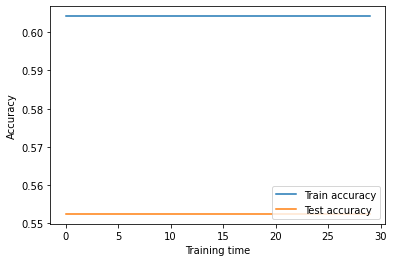

In [18]:
plot_accuracy(iterations, train_acc, test_acc)

In [19]:
get_accuracy(mlp, train_set)

0.6042031523642732

In [20]:
get_accuracy(mlp, test_set)

0.5524475524475524

# Hyperparameters

100%|██████████| 30/30 [00:02<00:00, 11.55it/s]


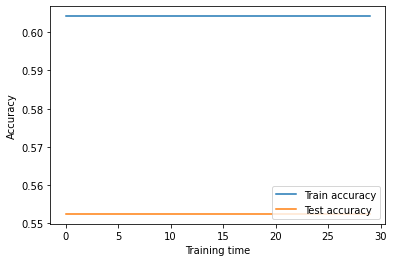

In [21]:
# Hyperparameters
iterations = 30
learning_rate = 0.01
weight_decay = 0.5
momentum = 0.6

mlp = MLP(input_shape=X.shape[1], num_classes=2)

optimizer = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)

loss_fn = torch.nn.CrossEntropyLoss()

train_acc, test_acc = train(network=mlp, train_set=train_set, optimizer=optimizer,
                            test_set=test_set, criterion=loss_fn, epochs=iterations)

plot_accuracy(iterations, train_acc, test_acc)